In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn .metrics import classification_report , accuracy_score , confusion_matrix




In [80]:
card_data = pd.read_csv("creditcard.csv")

In [81]:
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [82]:
card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [83]:
card_data.isnull().sum() #checked  missing values and found none

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [84]:
#checking how many legit transactions and fraudulent transaction
card_data["Class"].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# 284315 transaction is legit and 492 is unbalanced means data set is so much unbalanced

In [86]:
legit = card_data[card_data.Class==0]
fraudulent = card_data[card_data.Class ==1]

In [87]:
print(legit.shape)
print(fraudulent.shape)

(284315, 31)
(492, 31)


In [88]:
#checking measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [89]:
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [90]:
card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


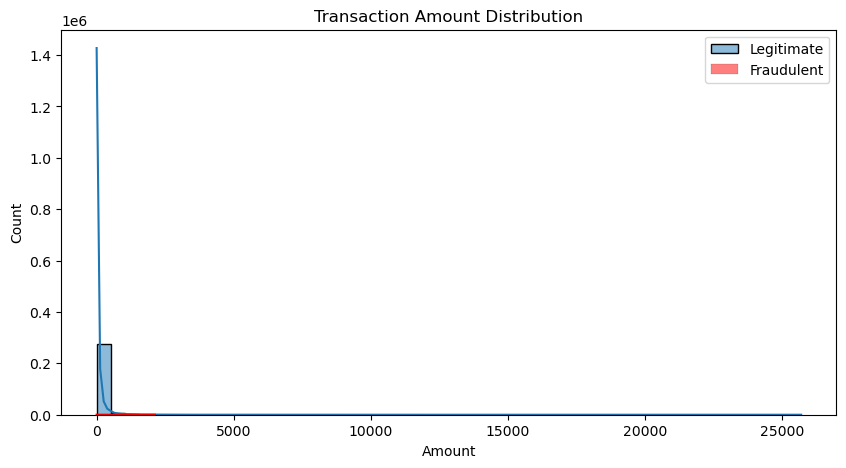

In [109]:
plt.figure(figsize=(10, 5))
sns.histplot(legit.Amount, bins=50, kde=True, label='Legitimate')
sns.histplot(fraudulent.Amount, bins=50, kde=True, color='red', label='Fraudulent')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()

In [91]:
# now we will read with the given unbalanced data
#we will take a sample data set make same amount of legit transaction and fraudulent transaction


In [92]:
legit_random_sample = legit.sample(n=492)

In [ ]:
#now concatenating two data frames


In [93]:
joined_dataset = pd.concat([legit_random_sample,fraudulent],axis=0)


In [94]:
joined_dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
217008,140725.0,1.979032,-0.465238,-3.134852,-0.637539,2.653130,3.145269,-0.082065,0.643048,0.228780,...,-0.007854,-0.042496,0.073403,0.763828,0.195336,0.576459,-0.087384,-0.074781,54.99,0
264323,161372.0,-4.619239,-0.216990,0.330538,-0.355106,-0.018282,-0.270037,-0.464505,0.837636,0.458171,...,-0.524153,-0.207983,0.958638,0.752048,0.652818,-0.626904,-1.661474,-0.589246,4.75,0
148988,90408.0,2.023294,0.831511,-1.082753,3.632438,1.226241,0.403203,0.246734,-0.235240,0.022605,...,0.033572,0.383593,0.006614,-0.010757,0.260852,0.100541,-0.070833,-0.057137,1.13,0
121748,76302.0,-0.597721,0.748126,-0.361545,-1.437523,3.148368,3.305647,1.010272,-0.076519,0.412847,...,0.021578,0.185366,-0.202558,0.980752,-0.190578,-0.786642,-1.191711,-0.596616,19.95,0
145887,87252.0,-0.465920,0.628365,1.449569,4.417351,1.034654,1.083905,0.103565,-0.624355,-0.226190,...,0.192156,1.231734,-0.113115,0.603061,-1.890037,0.069854,-0.907822,-0.133170,11.31,0


In [117]:
 joined_dataset["Class"].value_counts()


Class
0    492
1    492
Name: count, dtype: int64

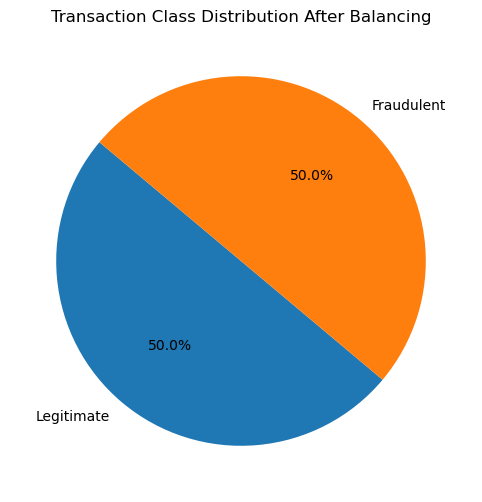

In [110]:
class_counts = joined_dataset["Class"].value_counts()  # Added this line
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title("Transaction Class Distribution After Balancing")
plt.show()

In [96]:
joined_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91775.199187,-0.087780,0.127660,0.135476,-0.022508,-0.038359,-0.057419,0.041823,0.101085,-0.011701,...,-0.005150,-0.017968,0.009604,-0.005617,0.015618,-0.002793,0.008416,-0.013210,-0.016325,74.731911
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [99]:
m = joined_dataset.drop(columns = "Class",axis =0 )
m

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
217008,140725.0,1.979032,-0.465238,-3.134852,-0.637539,2.653130,3.145269,-0.082065,0.643048,0.228780,...,-0.062477,-0.007854,-0.042496,0.073403,0.763828,0.195336,0.576459,-0.087384,-0.074781,54.99
264323,161372.0,-4.619239,-0.216990,0.330538,-0.355106,-0.018282,-0.270037,-0.464505,0.837636,0.458171,...,-1.815250,-0.524153,-0.207983,0.958638,0.752048,0.652818,-0.626904,-1.661474,-0.589246,4.75
148988,90408.0,2.023294,0.831511,-1.082753,3.632438,1.226241,0.403203,0.246734,-0.235240,0.022605,...,-0.215033,0.033572,0.383593,0.006614,-0.010757,0.260852,0.100541,-0.070833,-0.057137,1.13
121748,76302.0,-0.597721,0.748126,-0.361545,-1.437523,3.148368,3.305647,1.010272,-0.076519,0.412847,...,-0.089630,0.021578,0.185366,-0.202558,0.980752,-0.190578,-0.786642,-1.191711,-0.596616,19.95
145887,87252.0,-0.465920,0.628365,1.449569,4.417351,1.034654,1.083905,0.103565,-0.624355,-0.226190,...,-0.055464,0.192156,1.231734,-0.113115,0.603061,-1.890037,0.069854,-0.907822,-0.133170,11.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [100]:
n = joined_dataset["Class"]
n


217008    0
264323    0
148988    0
121748    0
145887    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [101]:
m_train, m_test , n_train , n_test = train_test_split(m,n,test_size = 0.2,stratify = n,random_state = 2 )

In [102]:
#now we will train our model (logistic Regression)

In [103]:
LR = LogisticRegression()
LR.fit(m_train,n_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
#now evaluating our model


In [105]:
#accuracy on training data  

m_train_prediction = LR.predict(m_train)
training_accuracy = accuracy_score(m_train_prediction , n_train)

In [106]:
print("accuracy of training data",training_accuracy)

accuracy of training data 0.9466327827191868


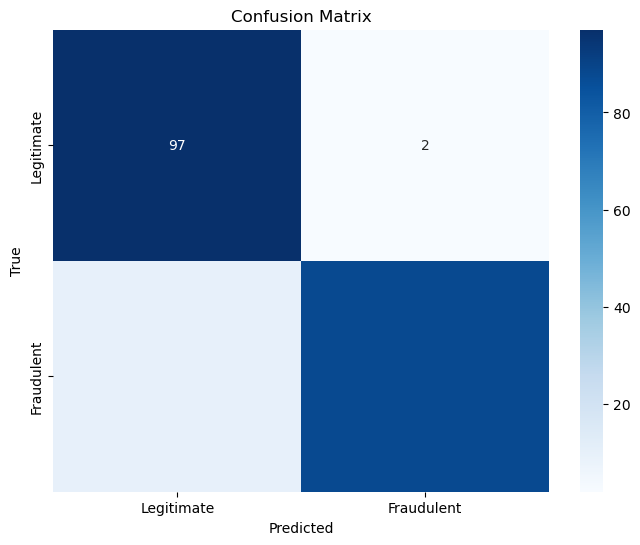

In [115]:
 #Visualization of confusion matrix (new lines added)
cm = confusion_matrix(n_test, m_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [107]:
#accuracy on testing data

m_test_prediction = LR.predict(m_test)

testing_accuracy = accuracy_score(m_test_prediction,n_test)


In [108]:
print("accuracy of testing data ", testing_accuracy)

accuracy of testing data  0.9390862944162437
